In [20]:
# Imports
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [21]:
# Constants
EBIBLE_REPO_DIR = '/mnt/data/share/ebible'
LICENCES_FILEPATH = f'{EBIBLE_REPO_DIR}/metadata/licences.tsv'

In [22]:
# Load-in the extracted licenses.tsv file
licenses_df = pd.read_csv(LICENCES_FILEPATH, sep='\t', dtype=str)
licenses_df

,ID,File,Language,Dialect,Vernacular Title,Licence Type,Licence Version,CC Licence Link,Copyright Holder,Copyright Years,Translation by
0,aai,E:\Work\eBible\projects\aai\copr.htm,Miniafia,NaN,NaN,by-nc-nd,4.0,http://creativecommons.org/licenses/by-nc-nd/4.0/,NaN,NaN,Translation by: anonymous
1,aak,E:\Work\eBible\projects\aak\copr.htm,Angave (Ankave),NaN,NaN,by-nc-nd,4.0,http://creativecommons.org/licenses/by-nc-nd/4.0/,"Wycliffe Bible Translators, Inc.",copyright © 1990,Translation by: Wycliffe Bible Translators
2,aau,E:\Work\eBible\projects\aau\copr.htm,Abau,NaN,NaN,by-nc-nd,4.0,http://creativecommons.org/licenses/by-nc-nd/4.0/,"Wycliffe Bible Translators, Inc.",copyright © 2006,Translation by: Wycliffe Bible Translators
3,aaz,E:\Work\eBible\projects\aaz\copr.htm,Amarasi,NaN,Uisneno In Kabin ma Prenat: Rais Manba'an Fe'u...,by-nd,4.0,http://creativecommons.org/licenses/by-nd/4.0/,"Unit Bahasa dan Budaya, Kupang NTT, Indonesia",copyright © 1999-2014,Translation by: Wycliffe Bible Translators
4,abt-maprik,E:\Work\eBible\projects\abt-maprik\copr.htm,Ambulas (Maprik) (Ambulas),Maprik,NaN,by-nc-nd,4.0,http://creativecommons.org/licenses/by-nc-nd/4.0/,"Wycliffe Bible Translators, Inc.",copyright © 1983,Translation by: Wycliffe Bible Translators
...,...,...,...,...,...,...,...,...,...,...,...
1271,yam,E:\Work\eBible\private_projects\yam\copr.htm,(Yamba),NaN,Ŋwàk Nwì Ma Rʉ̀k Nə̀ Fi,Unknown,NaN,NaN,"Wycliffe Bible Translators, Inc.",copyright © 2011,NaN
1272,zae,E:\Work\eBible\private_projects\zae\copr.htm,"Zapotec, Yareni",NaN,Ka Tisa ge Tata Jesucristuha,Unknown,NaN,NaN,"Wycliffe Bible Translators, Inc.",copyright © 2014,NaN
1273,zpg,E:\Work\eBible\private_projects\zpg\copr.htm,Guevea De Humboldt Zapotec,NaN,"Zapoteco, Guevea de Humboldt NT",Unknown,NaN,NaN,"Wycliffe Bible Translators, Inc.",copyright © 2019,NaN
1274,zpi,E:\Work\eBible\private_projects\zpi\copr.htm,"(Zapotec, Santa María Quiegolani)",NaN,Xdiiz Dëdyuzh kon disa,Unknown,NaN,NaN,"Wycliffe Bible Translators, Inc.",copyright © 2010,NaN


In [24]:
licenses_df[licenses_df['Licence Type'].isna()]

,ID,File,Language,Dialect,Vernacular Title,Licence Type,Licence Version,CC Licence Link,Copyright Holder,Copyright Years,Translation by


In [26]:
licenses_df[licenses_df['ID'].str.contains('engwmb')]

,ID,File,Language,Dialect,Vernacular Title,Licence Type,Licence Version,CC Licence Link,Copyright Holder,Copyright Years,Translation by
290,engwmb,E:\Work\eBible\projects\engwmb\copr.htm,NaN,NaN,World Messianic Bible,Public Domain,NaN,NaN,Public Domain,NaN,NaN
291,engwmbb,E:\Work\eBible\projects\engwmbb\copr.htm,NaN,NaN,World Messianic Bible British Edition,Public Domain,NaN,NaN,Public Domain,NaN,NaN


<AxesSubplot: >

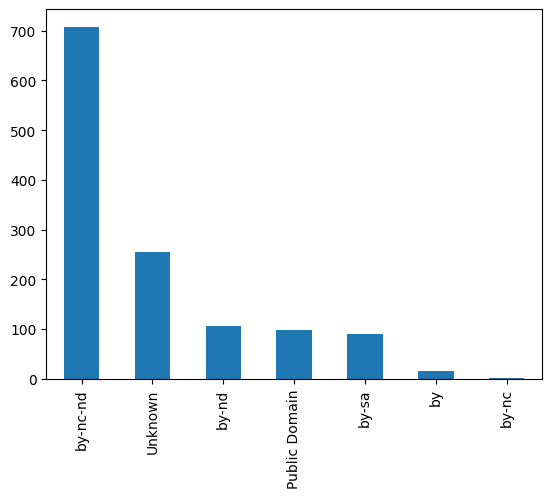

In [27]:
# Plot results
fig, ax = plt.subplots()
licenses_df['Licence Type'].value_counts(dropna=False).plot(ax=ax, kind='bar')

In [28]:
# Show counts
licenses_df['Licence Type'].value_counts(dropna=False)

by-nc-nd         708
Unknown          255
by-nd            107
Public Domain     99
by-sa             90
by                15
by-nc              2
Name: Licence Type, dtype: int64

In [30]:
# Total translations in the clear
licenses_df['Licence Type'].value_counts().sum() - \
licenses_df[licenses_df['Licence Type'].str.contains('Unknown')].shape[0]

1021

In [31]:
# Investigate unknowns
# pd.set_option('display.max_rows', 30)
licenses_df[licenses_df['Licence Type'].str.contains("Unknown") | licenses_df['Licence Type'].isna()]['Copyright Holder'].value_counts(dropna=False)

Wycliffe Bible Translators, Inc.                                   223
World Bible Translation Center                                      11
Ahle Kitab Society                                                   3
United Bible Societies                                               2
NaN                                                                  2
The Worldwide Bible Society Limited                                  2
Biblical Studies Press, L. L. C.                                     1
Wycliffe Bible Translators, Inc. and BFP Velberter Mission           1
Wycliffe Bible Translators, Inc. and The Bible Society of India      1
Hawaii Pidgin Bible Ministry                                         1
Society of Biblical Literature and Logos Bible Software              1
Bible League International                                           1
God’s Word to the Nations Mission Society, Inc.                      1
The Bible Society of Papua New Guinea                                1
Bible 

In [32]:
# Examples
# https://ebible.org/Bible/details.php?id=apyNT
# https://ebible.org/Bible/details.php?id=abp
# https://ebible.org/Bible/details.php?id=csy
# https://ebible.org/Bible/details.php?id=acd
# https://ebible.org/Bible/details.php?id=arq
# https://ebible.org/Bible/details.php?id=syll
# https://ebible.org/Bible/details.php?id=ukr1996

In [33]:
licenses_df[licenses_df['Licence Type'].str.contains("Unknown") & (licenses_df['Copyright Holder'].str.contains("Wycliffe") == False)]

,ID,File,Language,Dialect,Vernacular Title,Licence Type,Licence Version,CC Licence Link,Copyright Holder,Copyright Years,Translation by
1027,akh,E:\Work\eBible\private_projects\akh\copr.htm,Angal Heneng,Waola,NaN,Unknown,NaN,NaN,The Bible Society of Papua New Guinea,copyright © 1978,NaN
1029,amh,E:\Work\eBible\private_projects\amh\copr.htm,አማርኛ (Amharic),NaN,መጽሐፍ ቅዱስ,Unknown,NaN,NaN,United Bible Societies,"copyright © 1962, 2003",NaN
1032,arbwbtc,E:\Work\eBible\private_projects\arbwbtc\copr.htm,العربية (Arabic),Standard,NaN,Unknown,NaN,NaN,World Bible Translation Center,copyright © 2007,Translation by: World Bible Translation Center
1033,arq,E:\Work\eBible\private_projects\arq\copr.htm,"(Arabic, Algerian Spoken)",NaN,العهد الجديد باللهجة الجزائرية,Unknown,NaN,NaN,United Bible Societies,copyright © 2018,NaN
1045,ben2006,E:\Work\eBible\private_projects\ben2006\copr.htm,বাংলা (Bengali),NaN,পবিত্র বাইবেল,Unknown,NaN,NaN,World Bible Translation Center,copyright © 2001-2006,Translation by: World Bible Translation Center
1066,buk2013,E:\Work\eBible\private_projects\buk2013\copr.htm,Bugawac,NaN,NaN,Unknown,NaN,NaN,Lutheran Bible Translators Australia,copyright © 2013,NaN
1073,cmn-ncvs,E:\Work\eBible\private_projects\cmn-ncvs\copr.htm,中国语文 (Chinese),"Mandarin, simplified script",新译本,Unknown,NaN,NaN,The Worldwide Bible Society Limited,"copyright © 1976, 1992, 1999, 2001, 2005, 2010",Translation by: The Worldwide Bible Society Ltd.
1074,cmn-ncvt,E:\Work\eBible\private_projects\cmn-ncvt\copr.htm,中國語文 (Chinese),"Mandarin, traditional script",新譯本,Unknown,NaN,NaN,The Worldwide Bible Society Limited,"copyright © 1976, 1992, 1999, 2001, 2005, 2010",Translation by: The Worldwide Bible Society
1075,cmn2006,E:\Work\eBible\private_projects\cmn2006\copr.htm,中国语文 (Chinese),"Mandarin, simplified script",圣 经 普通话本,Unknown,NaN,NaN,World Bible Translation Center,"copyright © 2004, 2006",Translation by: World Bible Translation Center
1080,copshc,E:\Work\eBible\private_projects\copshc\copr.htm,ⲘⲉⲧⲢⲉⲙ̀ⲛⲭⲏⲙⲓ (Coptic),Sahidic,Sahidica - طبعة جديدة من العهد الجديد باللغة ا...,Unknown,NaN,NaN,J Warren Wells,copyright © 2000-2006,Translation by: J Warren Wells


In [36]:
# Check if the corpus includes any 'unknown' licensed projects
# or if any known licensed projects have been discluded
known_licensed_set = set(licenses_df[~(licenses_df['Licence Type'].str.contains('Unknown'))]['ID'].apply(lambda x: f'{x[:3]}-{x}.txt' if '-' not in x else f'{x.split("-")[0]}-{x}.txt').to_list())
print(f'Number of projects with known licenses = {len(known_licensed_set)}')

current_corpus_set = set([f'{project.name}' for project in (Path(EBIBLE_REPO_DIR) / Path('corpus')).iterdir()])
print(f'Number of projects currently in the corpus = {len(current_corpus_set)}')

print(f'\nProjects with an unknown license currently included in the corpus: \n{current_corpus_set - known_licensed_set}')
print(f'\nProjects with known license currently excluded from the corpus: \n{known_licensed_set - current_corpus_set}')

Number of projects with known licenses = 1021
Number of projects currently in the corpus = 1009

Projects with an unknown license currently included in the corpus: 
set()

Projects with known license currently excluded from the corpus: 
{'gue-gue.txt', 'djj-djj.txt', 'wlg-wlg.txt', 'kld-kld.txt', 'adt-adt.txt', 'alh-alh.txt', 'gup-gupk.txt', 'rmb-rmb.txt', 'kux-kux.txt', 'kky-kky.txt', 'yij-yij.txt', 'gia-gia.txt'}


### Conclusion

After manual inspection the following steps were taken:
1. Removed the following from the corpus since these were found to be too short (<100 content lines).
- `gue-gue.txt`
- `djj-djj.txt`
- `wlg-wlg.txt`
- `kld-kld.txt`
- `adt-adt.txt`
- `alh-alh.txt`
- `gup-gupk.txt`
- `rmb-rmb.txt`
- `kux-kux.txt`
- `kky-kky.txt`
- `yij-yij.txt`
- `gia-gia.txt`



In [19]:
# Testing
# licenses_df[licenses_df['ID'].str.contains("kud2014")]